In [14]:
from scipy.stats import bootstrap
import pandas as pd
import numpy as np 
import seaborn as sns

In [3]:
df = pd.read_csv('8_bootstrap_data.csv')

In [4]:
df.head()

,value,group
0,100.719713,experimental
1,106.771525,experimental
2,106.974612,experimental
3,109.249662,experimental
4,116.230142,experimental


In [5]:
df.groupby('group').agg({'value': 'count'})

,value
group,
control,760
experimental,494


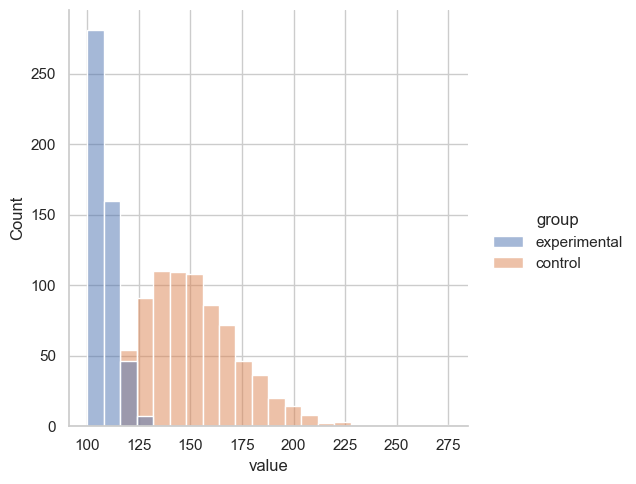

In [15]:
sns.displot(data=df, x="value", hue="group")

In [10]:
df.groupby('group').agg({'value': np.median})

C:\Users\911\AppData\Local\Temp\ipykernel_25708\2974333617.py:1: FutureWarning: The provided callable <function median at 0x000001FE64B42F20> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('group').agg({'value': np.median})


,value
group,
control,148.832127
experimental,106.982597


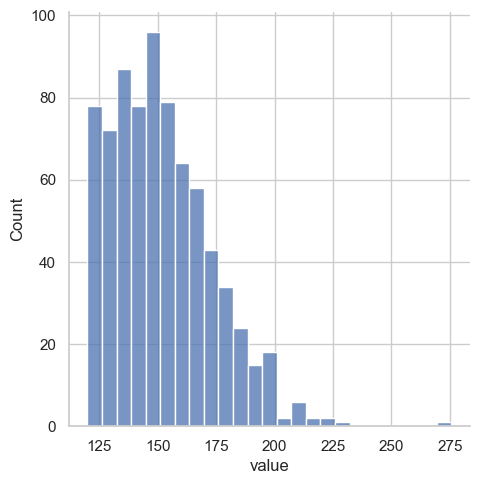

In [16]:
sns.displot(data=df[df.group == 'control'], x="value")

In [17]:
control_df = df[df.group == 'control']

In [18]:
control_df.value.median()

np.float64(148.83212650911054)

In [19]:
medians = []

In [95]:
n = 10000

In [20]:
for i in range(10000):
    sample_data = control_df.sample(frac=1, replace=True)
    sample_median = sample_data.value.median()
    medians.append(sample_median)

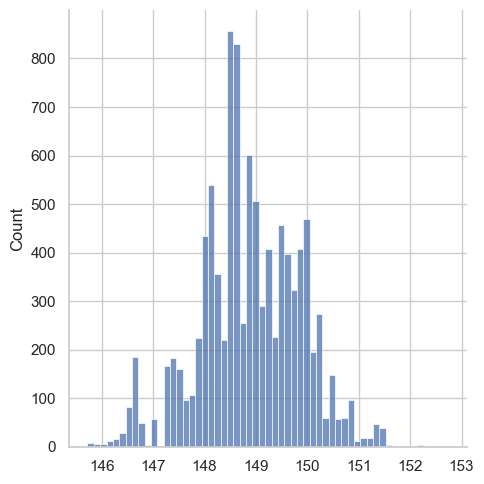

In [21]:
sns.displot(medians)

In [22]:
pd.Series(medians).quantile(0.975)

np.float64(150.7763799798184)

In [23]:
pd.Series(medians).quantile(0.025)

np.float64(146.66616569213227)

In [ ]:
bootstrap((control_df.value, ), np.mean)

BootstrapResult(confidence_interval=ConfidenceInterval(low=np.float64(150.48614158516006), high=np.float64(153.60466654034556)), bootstrap_distribution=array([151.8067776 , 153.37001844, 151.52778335, ..., 151.29460112,
       150.65214692, 151.12358086], shape=(9999,)), standard_error=np.float64(0.7912831148532478))

In [25]:
exp_df = df[df.group == 'experimental']
median_diff = []

for i in range(10000):
    sample_data_control = control_df.sample(frac=1, replace=True)
    sample_median_control = sample_data_control.value.median()
    
    
    sample_data_exp = exp_df.sample(frac=1, replace=True)
    sample_median_exp = sample_data_exp.value.median()
    
    sample_median_diff = sample_median_control - sample_median_exp
    median_diff.append(sample_median_diff)
    



In [26]:
pd.Series(median_diff).quantile(0.975)

np.float64(43.93132615815033)

In [27]:
pd.Series(median_diff).quantile(0.025)

np.float64(39.68018760406793)